In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# чтобы графики показывались внутри ноутбука
%matplotlib inline

In [61]:
df = pd.read_csv("S02-hw-dataset.csv")

In [57]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [58]:
df.shape       # количество столбцов

(41, 5)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [60]:
df.describe()  # базовые статистики только по числовым столбцам

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [62]:
df[df.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [53]:
# доля пропусков по столбцам
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [54]:
# количество пропусков по столбцам
df.isna().sum()

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

In [55]:
df.duplicated().sum()

np.int64(1)

In [38]:
df.columns

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')

In [52]:
df["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [31]:
df.groupby("country")["revenue"].agg(["count", "mean", "sum"])

,count,mean,sum
country,,,
CN,2,1054.000000,2108
DE,6,1445.500000,8673
FR,12,675.916667,8111
RU,13,790.076923,10271
US,8,557.375000,4459


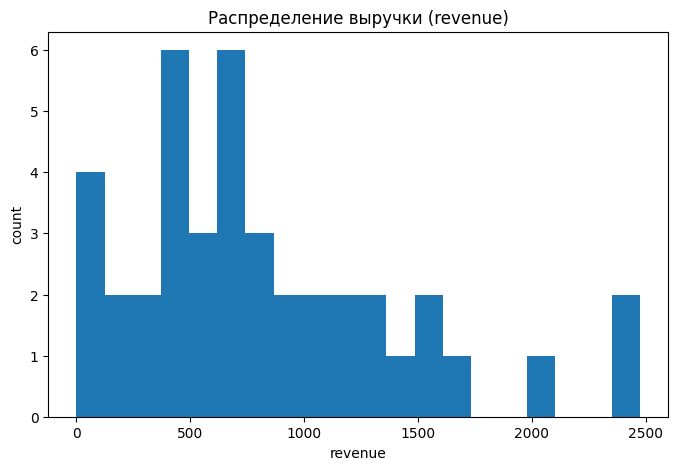

In [48]:
# hist revenue
plt.figure(figsize=(8, 5))
plt.hist(df["revenue"].dropna(), bins=20)
plt.xlabel("revenue")
plt.ylabel("count")
plt.title("Распределение выручки (revenue)")
plt.savefig("figures/1.png", dpi=150, bbox_inches="tight")
plt.show()

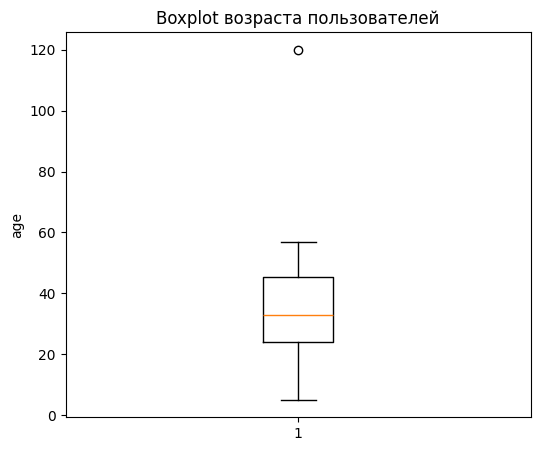

In [49]:
# boxplot age
plt.figure(figsize=(6, 5))
plt.boxplot(df["age"].dropna(), vert=True)
plt.ylabel("age")
plt.title("Boxplot возраста пользователей")
plt.savefig("figures/2", dpi=150, bbox_inches="tight")
plt.show()


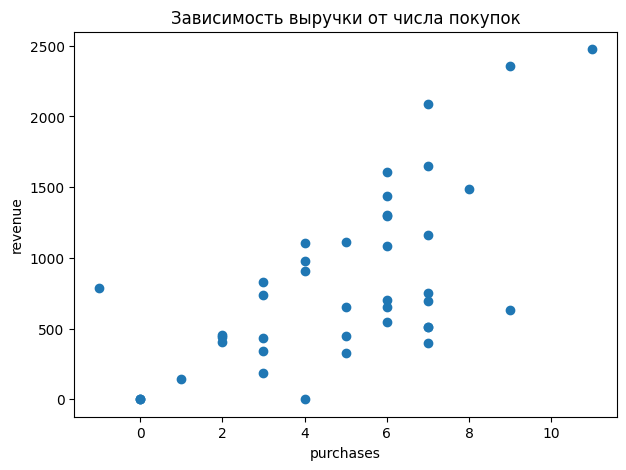

In [50]:
plt.figure(figsize=(7, 5))
plt.scatter(df["purchases"], df["revenue"])
plt.xlabel("purchases")
plt.ylabel("revenue")
plt.title("Зависимость выручки от числа покупок")
plt.savefig("figures/3.png", dpi=150, bbox_inches="tight")
plt.show()
